# Dataset metadata exploration

In [4]:
%matplotlib inline

In [5]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from skimage import io
import plotly.graph_objects as go


In [31]:
import cv2
import matplotlib.pyplot as plt

Load metadata dataset

In [6]:
df = pd.read_csv('HAM10000_metadata.csv')

In [7]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [8]:
df.shape

(10015, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [10]:
df.age.describe()

count    9958.000000
mean       51.863828
std        16.968614
min         0.000000
25%        40.000000
50%        50.000000
75%        65.000000
max        85.000000
Name: age, dtype: float64

In [11]:
# check for missing values
df.isna().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

57 missing values were found in Age feature. I will analyze the data distribution through a boxplot and a histogram.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='age'>

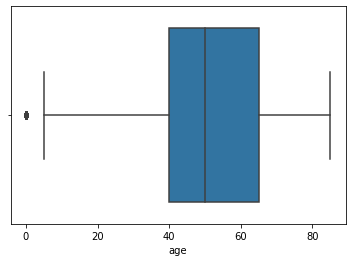

In [12]:
# Box plot
sns.boxplot(df.age)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='age', ylabel='Density'>

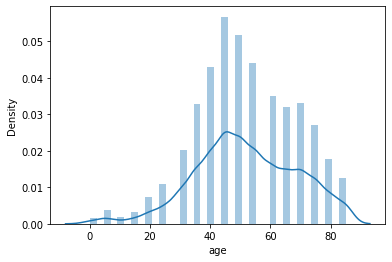

In [13]:
#Distribution plot
sns.distplot(df.age)

Since a clear symmetric data distribution is visible I will use the Mean to fill the missing Age values

In [14]:
df['age'].fillna(df['age'].mean(), inplace=True)

In [15]:
#check if the missing values still persist
df.isna().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

In [16]:
#Gender data representation
fig = px.histogram(df, x="sex", color="sex", text_auto=True)
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [17]:
#Skin cancer represented on dataset
fig = px.histogram(df, x="dx", color="dx", text_auto=True)
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [18]:
#Skin cancer localization
fig = px.histogram(df, x="localization", color="localization", text_auto=True)
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [19]:
#Skin cancer types of diagnosis
fig = px.histogram(df, x="dx_type", color="dx_type", text_auto=True)
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [20]:
# How the cancers were diagnosticated?
fig = px.histogram(df, x="dx", color="dx_type", text_auto=True, barmode='group')
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [21]:
# Which skin cancer is more prevalent on man and women?
fig = px.histogram(df, x="dx", color="sex", text_auto=True, barmode='group')
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [22]:
# Gender and age
fig = px.histogram(df, x="age", color="sex", text_auto=True)
fig.show()

In [23]:
# Age and cancer prevalence
fig = px.histogram(df, x="age", color="dx", text_auto=True)
fig.show()

In [24]:
# Age and cancer localization
fig = px.histogram(df, x="age", color="localization", text_auto=True)
fig.show()

In [25]:
# Most prevalent localization of cancer in man and women
fig = px.histogram(df, x="localization", color="sex", text_auto=True, barmode='group')
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [26]:
# Skin cancer and it's localization
fig = px.histogram(df, x="localization", color="dx", text_auto=True)
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [27]:
# Trying to capture in a easier way visual relationships between the different features presented on dataset
fig = px.sunburst(df, path=['dx', 'localization', 'age', 'sex'])
fig.show()

Image containing examples of each cancer present in dataset :

In [28]:
# Skin cancer presented on dataset
cancer_list = df['dx'].unique()
cancer_list

array(['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec'], dtype=object)

In [29]:
# Select in a random way 3 representative pictures of each cancer
dict_pictures = {}

for cancer in cancer_list:
  dx_list = df['image_id'].loc[df['dx'] == cancer].sample(3, random_state=1)
  dict_pictures[cancer] = dx_list

dict_pictures

{'bkl': 775     ISIC_0025465
 436     ISIC_0025986
 1033    ISIC_0027167
 Name: image_id, dtype: object, 'nv': 5167    ISIC_0027618
 5519    ISIC_0029165
 5303    ISIC_0029690
 Name: image_id, dtype: object, 'df': 1189    ISIC_0025980
 1139    ISIC_0030757
 1151    ISIC_0025622
 Name: image_id, dtype: object, 'mel': 1517    ISIC_0032187
 2097    ISIC_0026796
 1337    ISIC_0031779
 Name: image_id, dtype: object, 'vasc': 2398    ISIC_0024402
 2436    ISIC_0027790
 2351    ISIC_0032557
 Name: image_id, dtype: object, 'bcc': 2509    ISIC_0027865
 2808    ISIC_0024897
 2746    ISIC_0030511
 Name: image_id, dtype: object, 'akiec': 9745    ISIC_0032455
 9948    ISIC_0027562
 9964    ISIC_0026984
 Name: image_id, dtype: object}

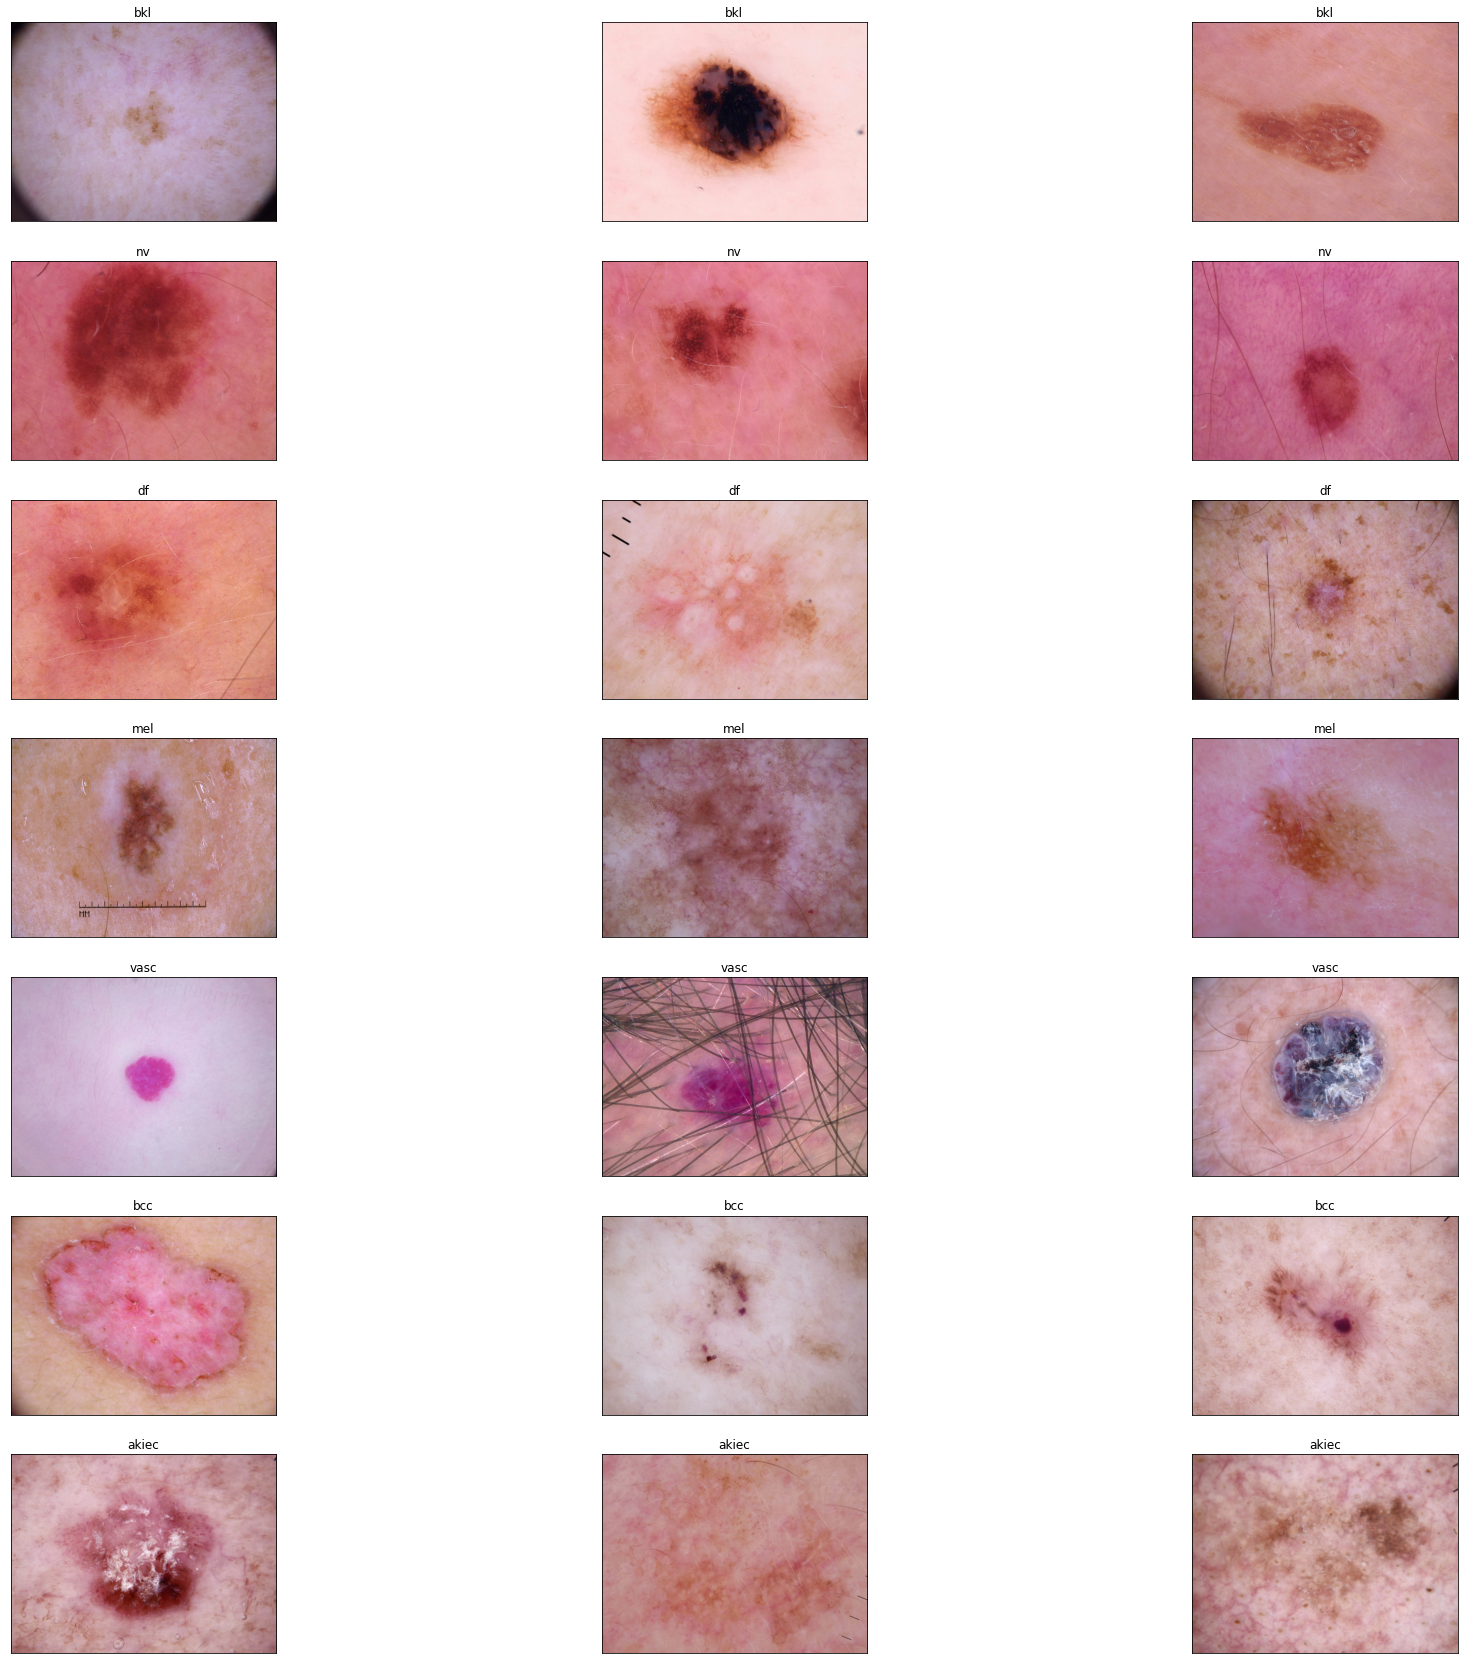

In [45]:
fig = plt.figure(figsize=(30, 30))

row = 1
column = 1
pos=1
for key, lista in dict_pictures.items():
  for i in lista:
    sub = plt.subplot(7, 3, pos)
    id = i+'.jpg'
    img = cv2.imread(id)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    sub.set_xticks(())
    sub.set_yticks(())
    sub.set_title(key)
    column += 1
    pos += 1


  column = 1
  row += 1

fig.savefig('mosaic_skin_cancer.png')